# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,boxcox

# Machine Learning library

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset:-

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.shape

(30, 17)

In [7]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 30 observations with 17 features.


In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

As we can see there is no null or missing values are present in this dataset

# Checking the datatype of the column:-¶

In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Observation :
    - All value is in numeric only so no need to use label encoder
    - 16 integer and 1 float variable present in dataset.No categorical value present in 
       dataset
    -we can see most of the columns are intiger type except ERA which stands for Earned Run Average

# Dataframe Description:-

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


    R: Runs,

    AB: At Bats

    H: Hits

    2B: Doubles

    3B: Triples

    HR: Homeruns

    BB: Walks

    SO: Strikeouts

    SB: Stolen Bases

    RA: Runs Allowed

    ER: Earned Runs

    ERA: Earned Run Average (ERA)

    CG: Shutouts

    SV: Saves,

    SV: Complete Games

    E: Errors

    W: Win

this is the full form f all the datas which is given to us

# Checking the Null value:-

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

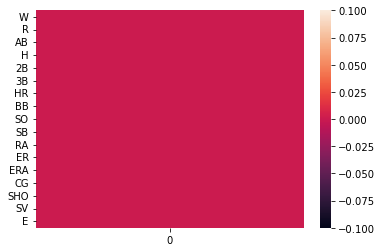

In [11]:
sns.heatmap(df.isnull().sum().to_frame())

as we can see there is no null values are present inside this dataframe

In [12]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

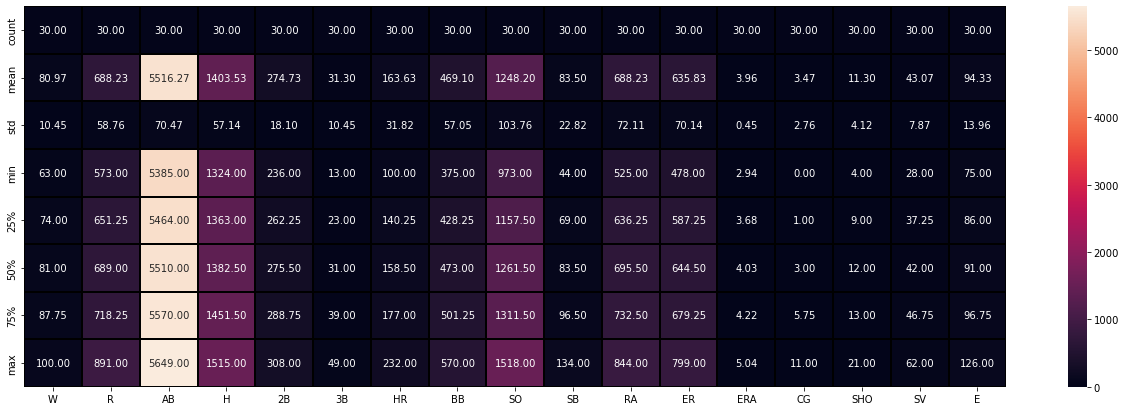

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.01,linecolor='black',fmt='0.2f')

In [14]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# data visualization:-

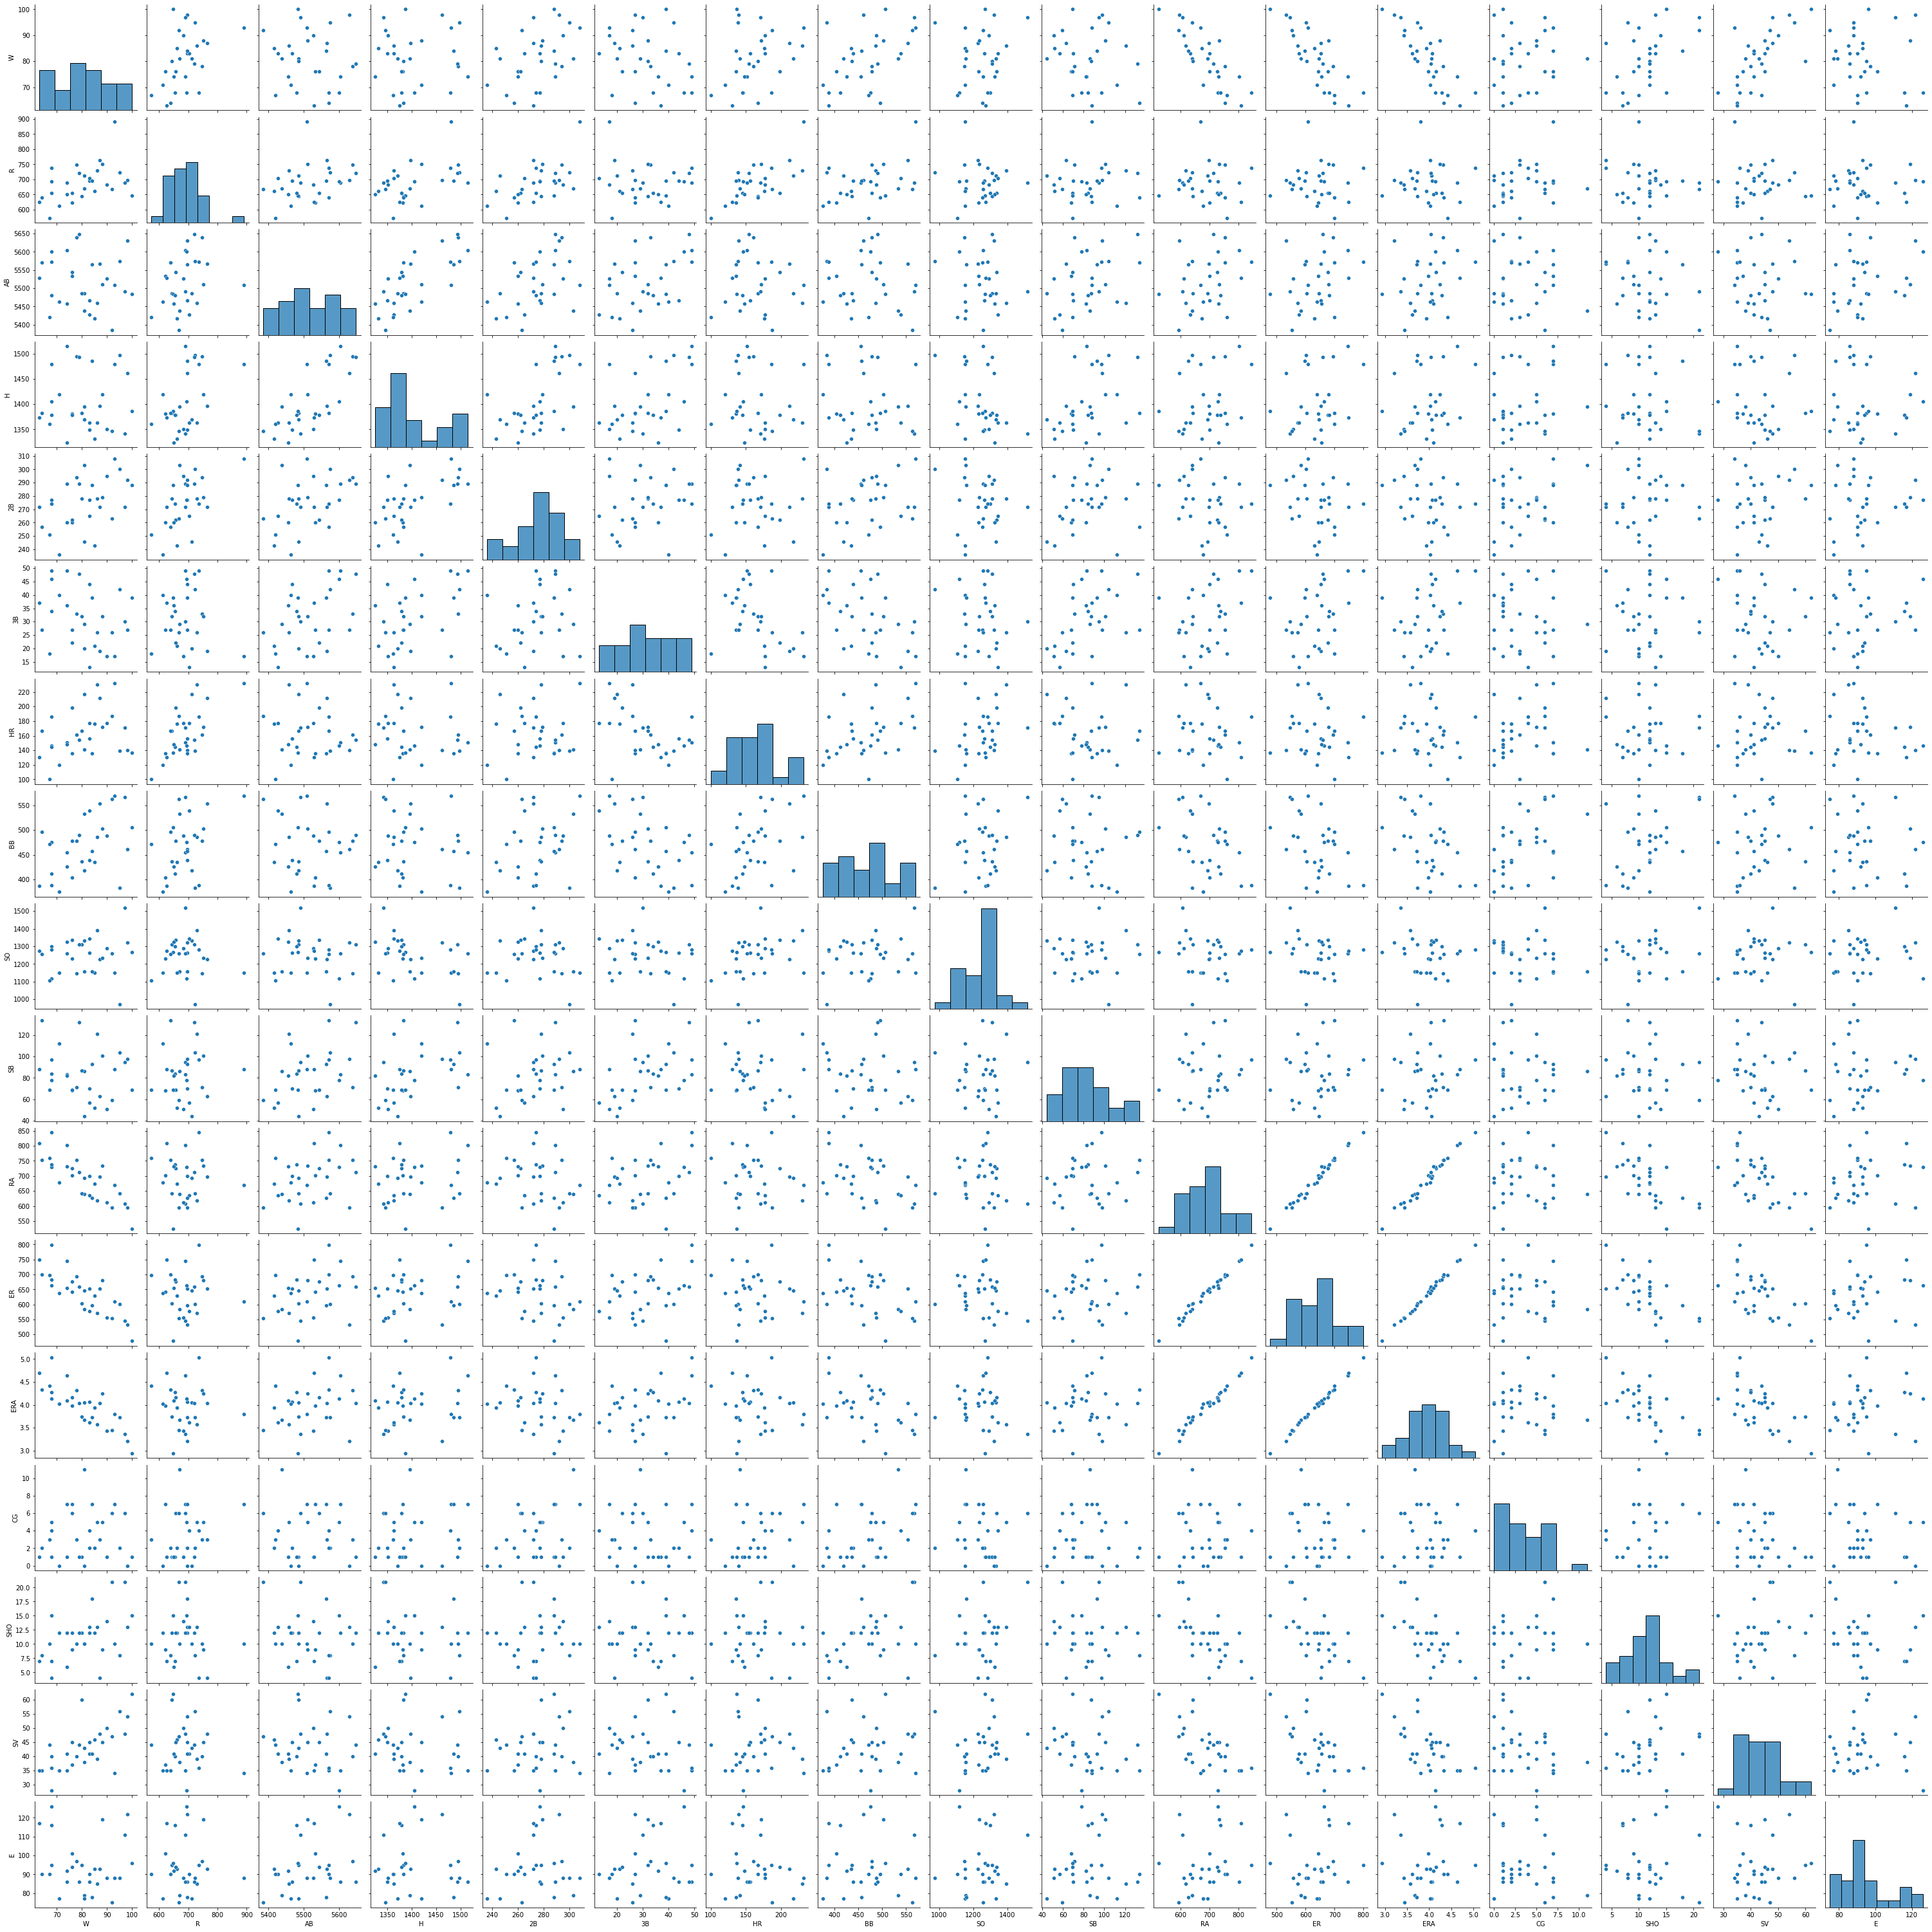

In [36]:
sns.pairplot(df)
plt.show()

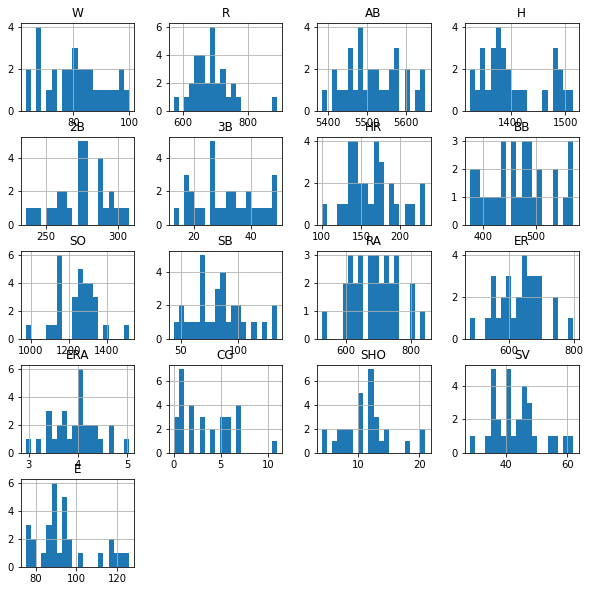

In [80]:
df.hist(bins=20,figsize=(10,10))
plt.show()

it shows histogrm view of all datas which are given

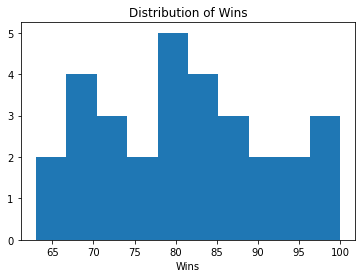

In [84]:
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

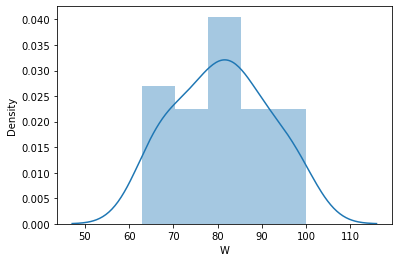

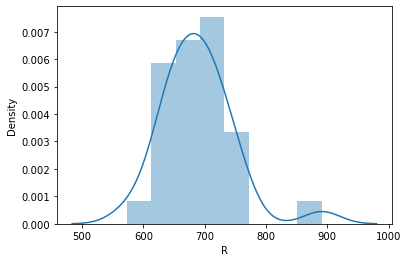

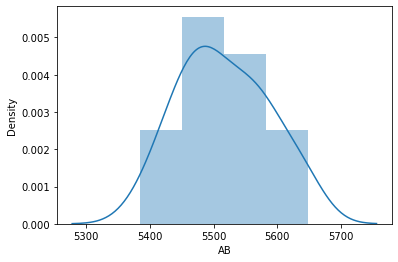

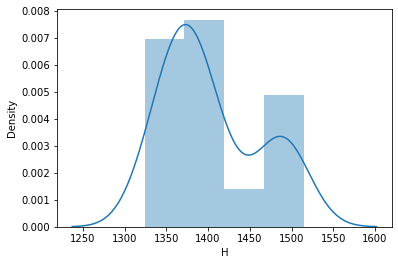

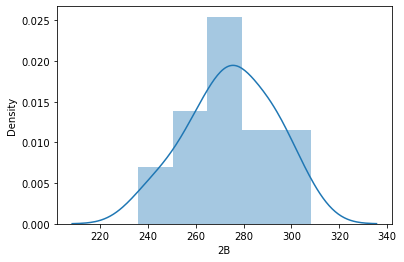

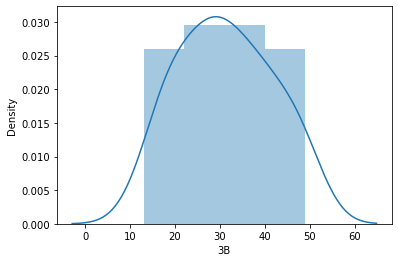

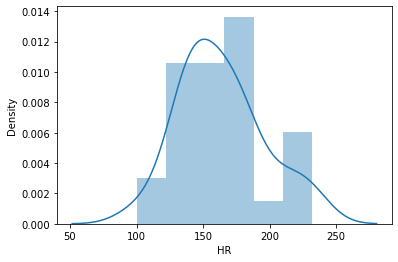

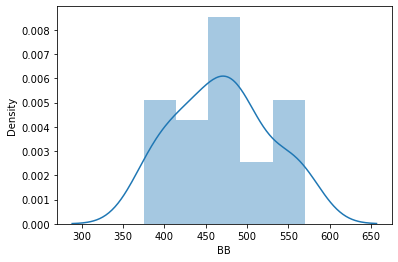

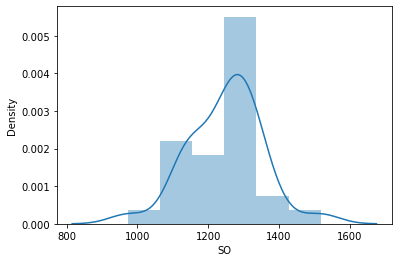

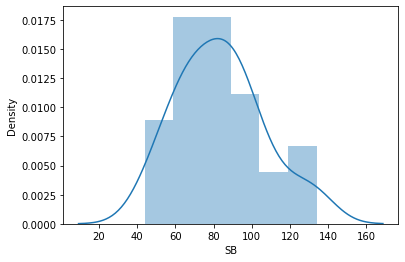

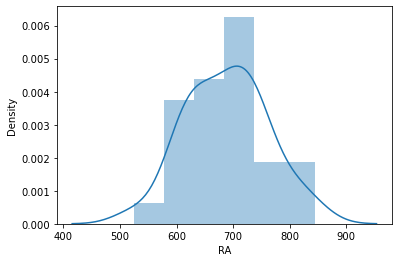

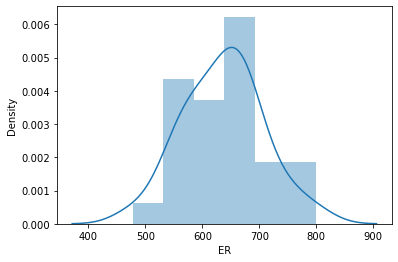

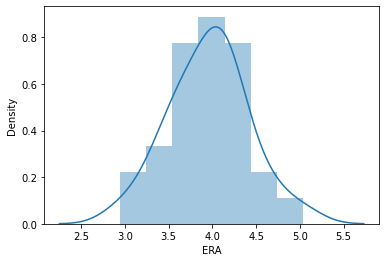

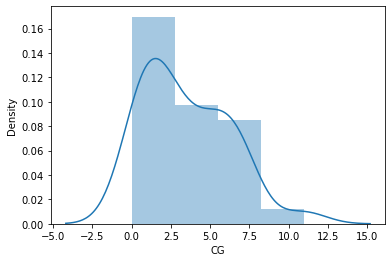

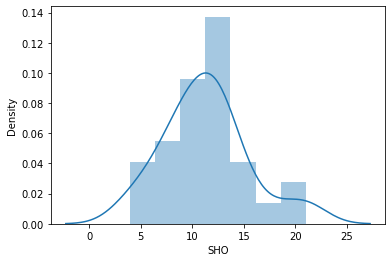

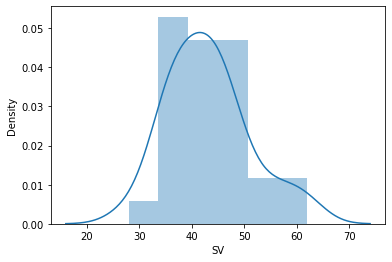

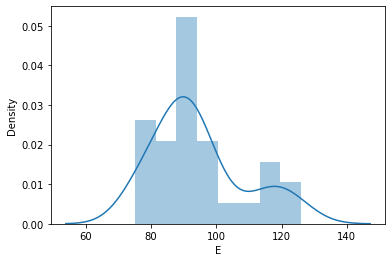

In [83]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:xlabel='W', ylabel='R'>

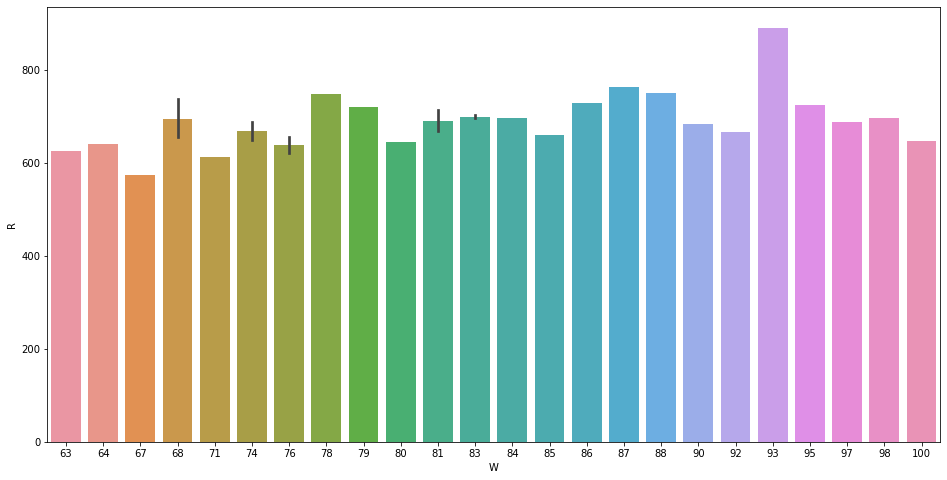

In [85]:
plt.figure(figsize = (16,8))
sns.barplot(x='W',y='R',data=df)

As we can see when runs are mostly 800+ the wins rate is 93+

<AxesSubplot:xlabel='AB', ylabel='R'>

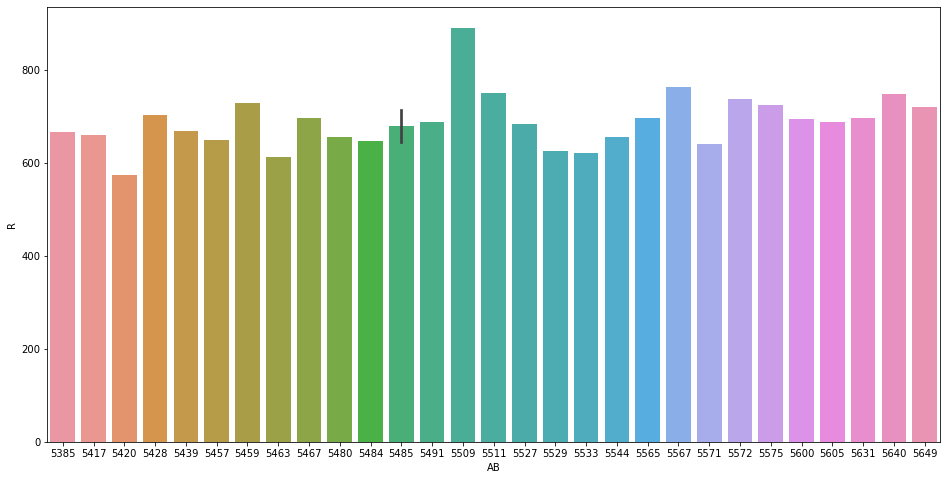

In [86]:
plt.figure(figsize = (16,8))
sns.barplot(x='AB',y='R',data=df)

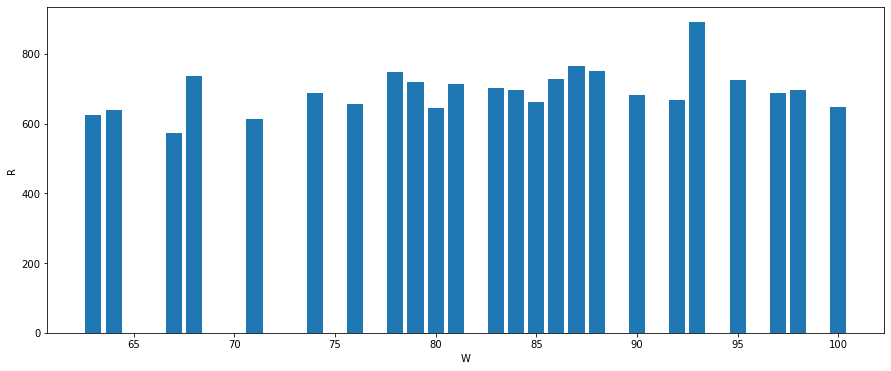

In [87]:
plt.figure(figsize=[15,6])
plt.bar(df['W'],df['R'])
plt.xlabel('W')
plt.ylabel('R')
plt.show()

from above fig we can see when runs are high the team wins 93 times.

<AxesSubplot:xlabel='R', ylabel='3B'>

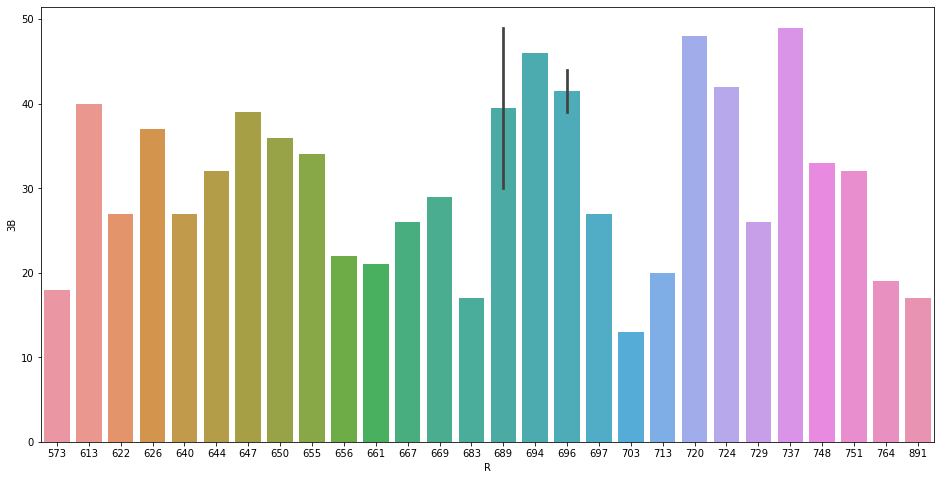

In [88]:
plt.figure(figsize = (16,8))
sns.barplot(x='R',y='3B',data=df)

from above we can see runs with tripes most runs with triple is 737 which is almost 50 times

<AxesSubplot:xlabel='R', ylabel='2B'>

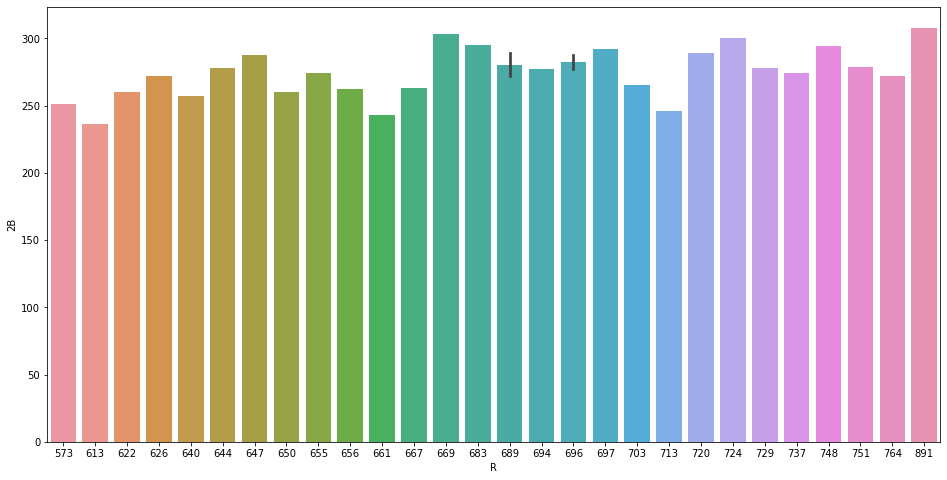

In [89]:
plt.figure(figsize = (16,8))
sns.barplot(x='R',y='2B',data=df)

most runs made from doubles is 891 which is from almost 300 times

<AxesSubplot:xlabel='R', ylabel='HR'>

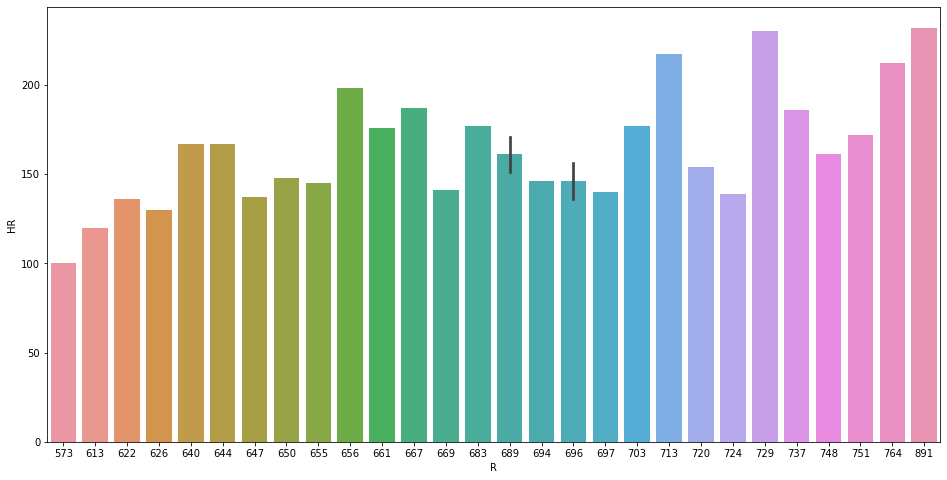

In [94]:
plt.figure(figsize = (16,8))
sns.barplot(x='R',y='HR',data=df)

when home runs 200 times or more runs are 891

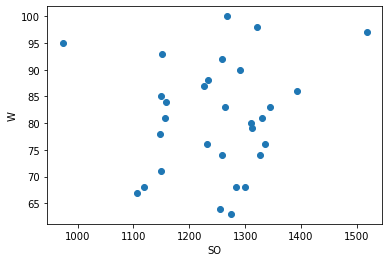

In [95]:
plt.scatter(df['SO'],df['W'])
plt.xlabel('SO')
plt.ylabel('W')
plt.show()

we can see when strikeouts are incresing the winning match also increasing

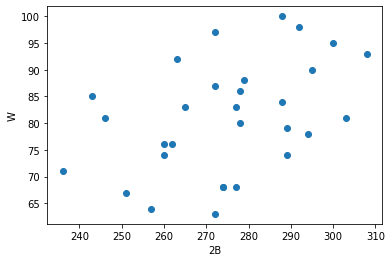

In [96]:
plt.scatter(df['2B'],df['W'])
plt.xlabel('2B')
plt.ylabel('W')
plt.show()

Winning % will increing when double runs are between 285-310

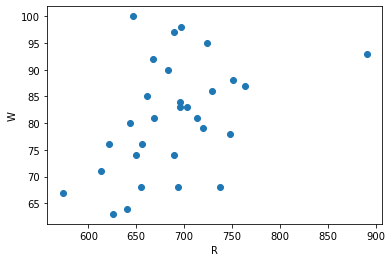

In [97]:
plt.scatter(df['R'],df['W'])
plt.xlabel('R')
plt.ylabel('W')
plt.show()

<AxesSubplot:xlabel='R', ylabel='W'>

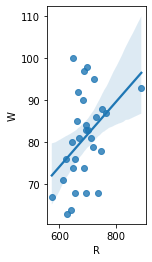

In [98]:
plt.subplot(1,3,2)
sns.regplot(x='R',y='W',data=df)

it shows when runs are increing the wining rate also increasing.most no of wins are in runs between 600-650

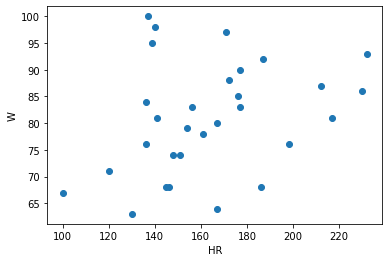

In [99]:
plt.scatter(df['HR'],df['W'])
plt.xlabel('HR')
plt.ylabel('W')
plt.show()

we can see homeruns home runs between 130-180 made a very good impact on win the matches

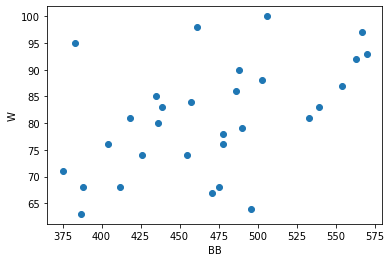

In [100]:
plt.scatter(df['BB'],df['W'])
plt.xlabel('BB')
plt.ylabel('W')
plt.show()

we can clearly see that when the walks are more than 500 then there is maxm chance of winning the matches.

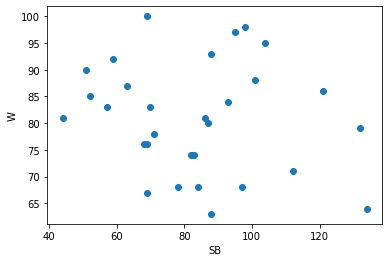

In [102]:
plt.scatter(df['SB'],df['W'])
plt.xlabel('SB')
plt.ylabel('W')
plt.show()

Stolen bases between 80-100 have more impact on winning the match

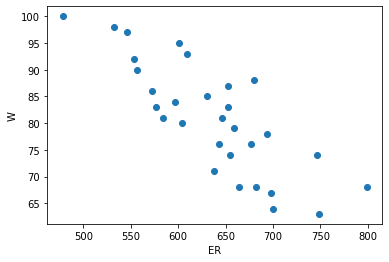

In [103]:
plt.scatter(df['ER'],df['W'])
plt.xlabel('ER')
plt.ylabel('W')
plt.show()

we can see it gradually decrease ..means when the earned runs is less than 500 there is 100% chance to win the matches.

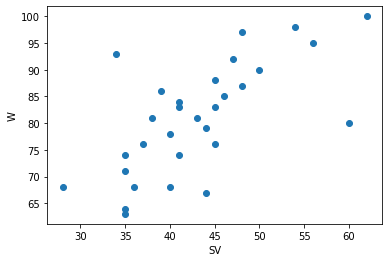

In [104]:
plt.scatter(df['SV'],df['W'])
plt.xlabel('SV')
plt.ylabel('W')
plt.show()

here we can see saves are taking a mjor roll in wins as when 60+ saves there is 100% of chance of winning the matches

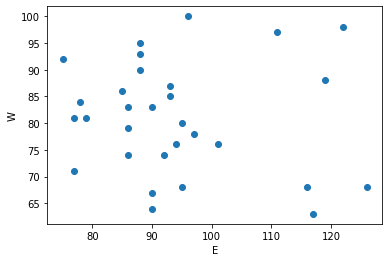

In [108]:
plt.scatter(df['E'],df['W'])
plt.xlabel('E')
plt.ylabel('W')
plt.show()

as we can see when error are of 90-100 there is a chance of win the matches more

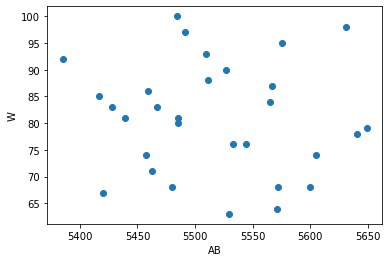

In [107]:
plt.scatter(df['AB'],df['W'])
plt.xlabel('AB')
plt.ylabel('W')
plt.show()

as we can see it clearly distributed soo i thing at bats is not soo important for wins

<AxesSubplot:xlabel='BB', ylabel='W'>

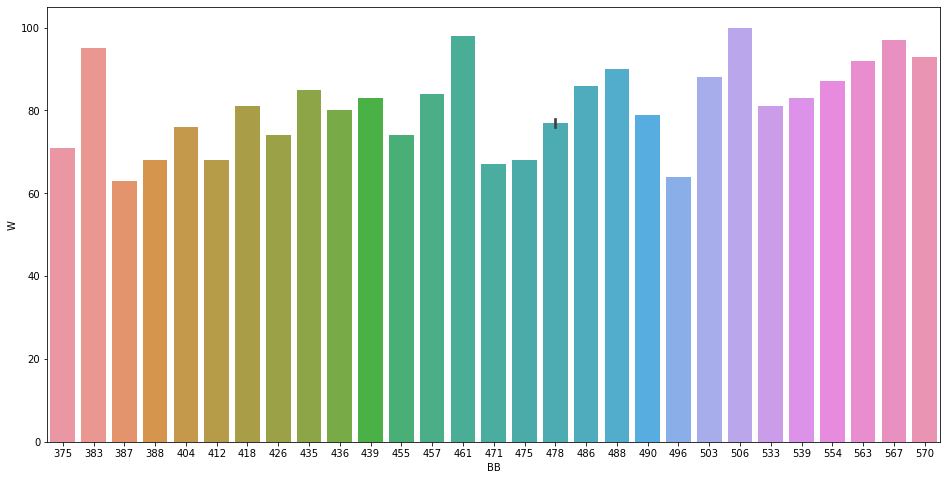

In [109]:
plt.figure(figsize = (16,8))
sns.barplot(x='BB',y='W',data=df)

when walks are  383,461,506 there is 95% wins

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

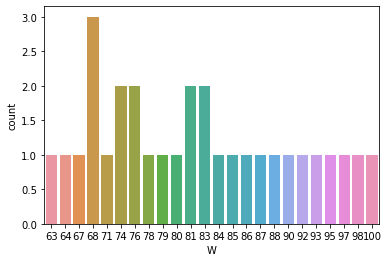

In [114]:
sns.countplot(x='W',data=df)
df['W'].value_counts()

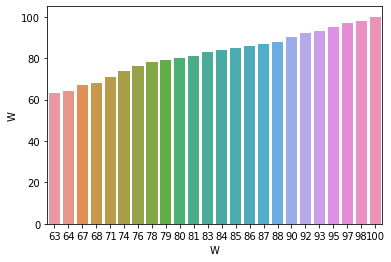

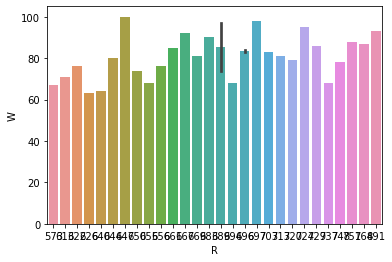

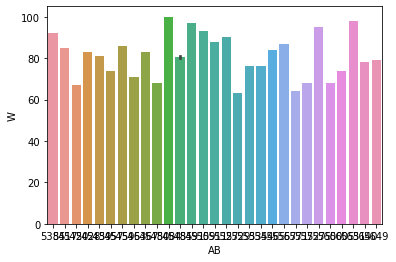

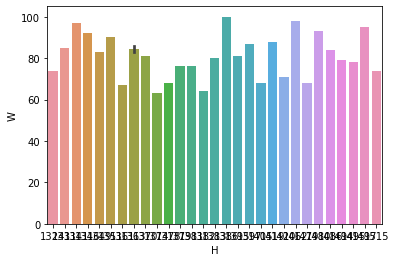

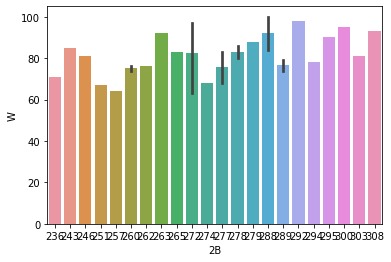

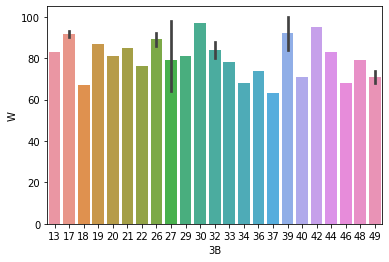

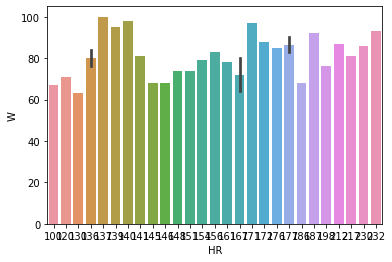

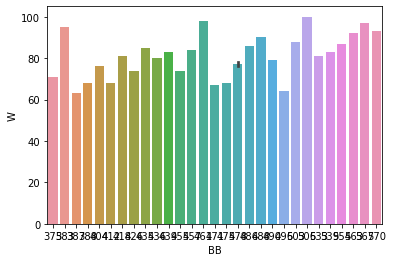

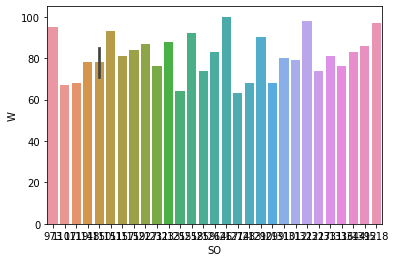

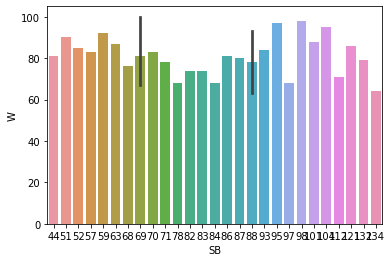

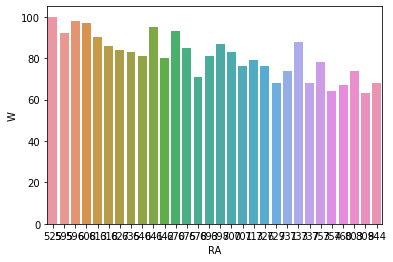

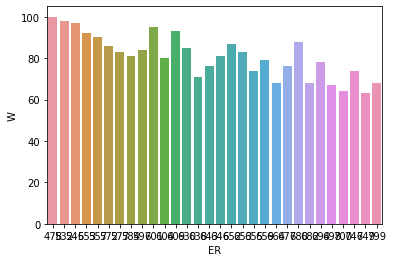

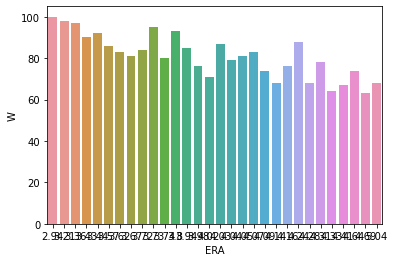

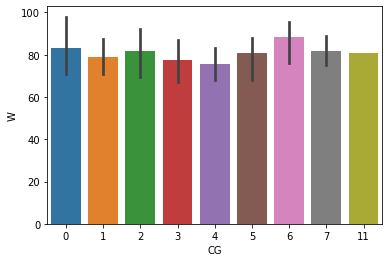

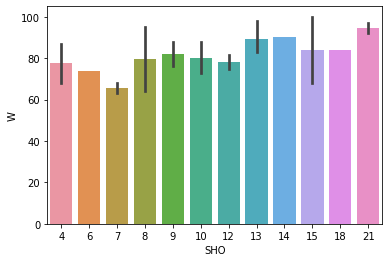

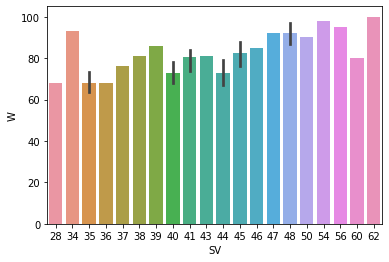

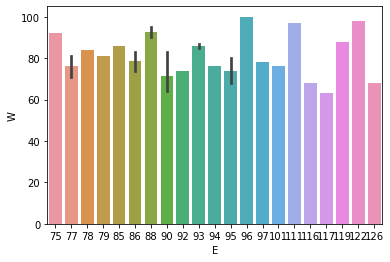

In [113]:
for i in df.columns:
    plt.figure()
    sns.barplot(x=df[i],y=df.W)

<AxesSubplot:xlabel='W', ylabel='Count'>

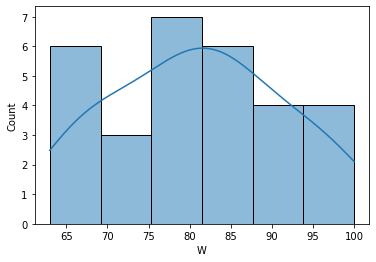

In [54]:
sns.histplot(x="W",data=df,kde=True)

here we normally distributed the wins with the help of histogram

<AxesSubplot:xlabel='W', ylabel='Density'>

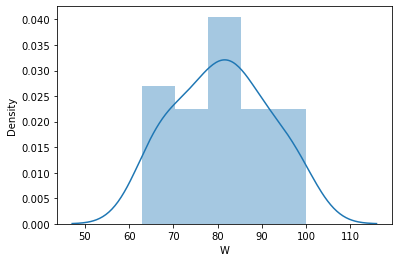

In [116]:
sns.distplot(df['W'])

In [117]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Since the dataset has a lot of string values contains so we will use encoding techniques to convert the string data to the numerical data

# Checking Correlation:-

In [118]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

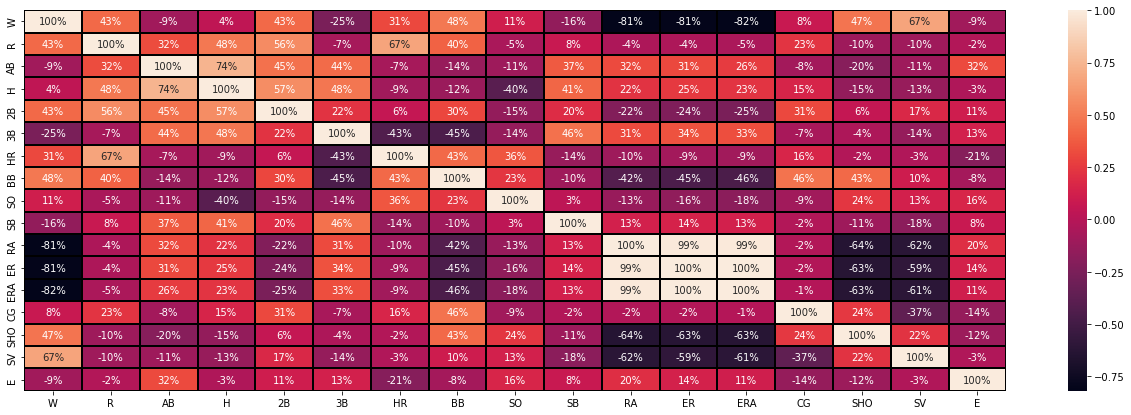

In [120]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.01,linecolor='black',fmt='0.0%')

- as we can see in above sns plot RA,ER,ERA are correlated with eachother
-

# Another way to represent columns which is highly correlated:-

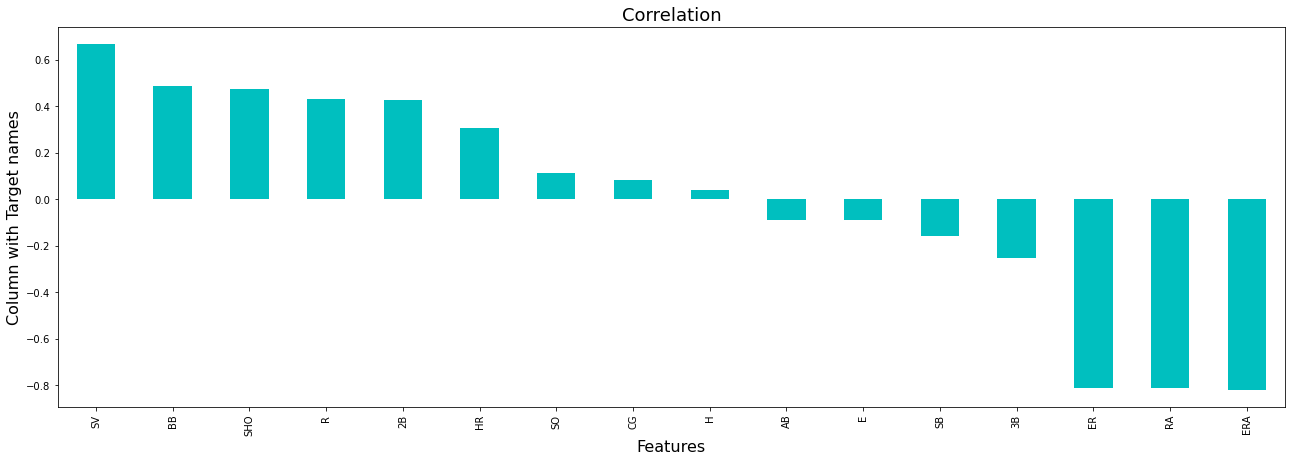

In [121]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Column with Target names',fontsize=16)
plt.title('Correlation',fontsize=18)
plt.show()

-here we can see SV is highly corelated..after SV ,BB,SHO,R,2B respectivly

# Checking Skewness:-

In [21]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# Outliers Checking:-

In [122]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

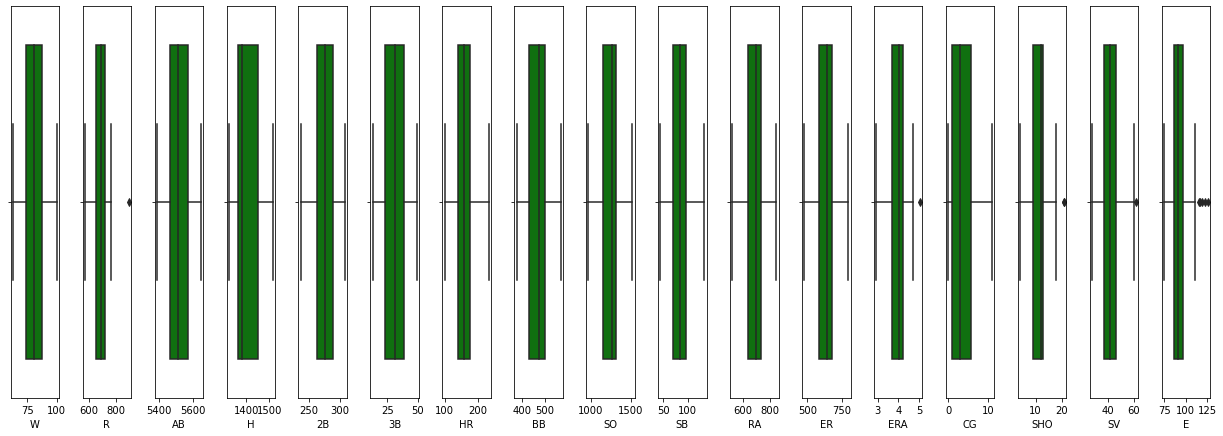

In [123]:
collist=df.columns.values
ncol=30
nrows=15
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

W         AxesSubplot(0.125,0.749828;0.133621x0.130172)
R      AxesSubplot(0.285345,0.749828;0.133621x0.130172)
AB      AxesSubplot(0.44569,0.749828;0.133621x0.130172)
H      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
2B     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
3B        AxesSubplot(0.125,0.593621;0.133621x0.130172)
HR     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
BB      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
SO     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
SB     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
RA        AxesSubplot(0.125,0.437414;0.133621x0.130172)
ER     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
ERA     AxesSubplot(0.44569,0.437414;0.133621x0.130172)
CG     AxesSubplot(0.606034,0.437414;0.133621x0.130172)
SHO    AxesSubplot(0.766379,0.437414;0.133621x0.130172)
SV        AxesSubplot(0.125,0.281207;0.133621x0.130172)
E      AxesSubplot(0.285345,0.281207;0.133621x0.130172)
dtype: object

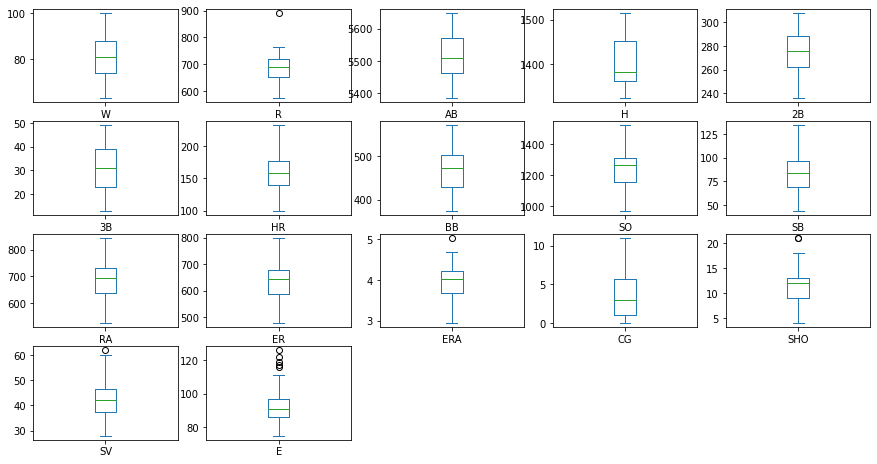

In [24]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

 here we can see there is some outliers are present in R,ERA,SHO,,SV,E

<AxesSubplot:>

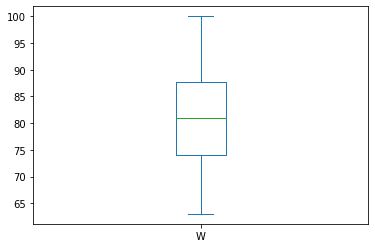

In [124]:
df['W'].plot.box()

<AxesSubplot:>

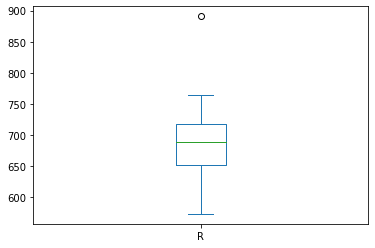

In [125]:
df['R'].plot.box()

<AxesSubplot:>

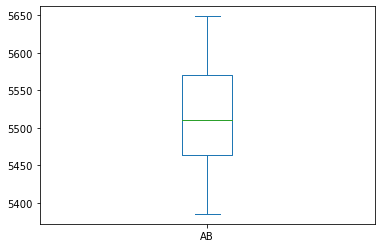

In [126]:
df['AB'].plot.box()

we can check this like this also but we checked all the columns in same box plot figures in same code

# Outlier Removal:-

In [127]:
df.shape

(30, 17)

In [129]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [130]:
df_new=df[(z<3).all(axis=1)]

In [131]:
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [132]:
df_new.shape

(29, 17)

as we can see only 1 data removed as a outlier.so we can run models with the previous dataset

# % of data LOss:-

In [133]:
loss=(30-29)/30*100

In [134]:
loss

3.3333333333333335

3.33% of data is lost

# Removing highly negative correlated column:-

In [135]:
df_new.drop(['RA','ER',],axis=1,inplace=True)

In [136]:
df_new.drop('ERA',axis=1,inplace=True)

# Spliting X and Y Data:-

In [39]:
x = df_new.iloc[:,1:-1]
y = df_new['W']

In [40]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV
0,724,5575,1497,300,42,139,383,973,104,2,8,56
1,696,5467,1349,277,44,156,439,1264,70,2,12,45
2,669,5439,1395,303,29,141,533,1157,86,11,10,38
3,622,5533,1381,260,27,136,404,1231,68,7,9,37
4,689,5605,1515,289,49,151,455,1259,83,7,12,35
6,764,5567,1397,272,19,212,554,1227,63,3,4,48
7,713,5485,1370,246,20,217,418,1331,44,0,10,43
8,644,5485,1383,278,32,167,436,1310,87,1,12,60
9,748,5640,1495,294,33,161,478,1148,71,3,10,40
10,751,5511,1419,279,32,172,503,1233,101,5,9,45


In [41]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# Removing Skewness

In [42]:
df_x=power_transform(x)
df_x=pd.DataFrame(df_x)

In [43]:
x=df_x

# Standard_Scaling:-

In [44]:
scalar=StandardScaler()
x=scalar.fit_transform(x)

# Finding best random state:-

In [49]:
from sklearn.metrics import accuracy_score

In [52]:
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"Best random state :{i} and Train r2 score:{r2_score(y_train,pred_train)}")
    print(f"Best random state :{i} and Test r2 score:{r2_score(y_test,pred_test)}")
    print("")

Best random state :1 and Train r2 score:0.8550783206268826
Best random state :1 and Test r2 score:0.6944530201712394

Best random state :2 and Train r2 score:0.8173961865951548
Best random state :2 and Test r2 score:-0.8302730889884646

Best random state :3 and Train r2 score:0.8199055316941919
Best random state :3 and Test r2 score:0.7257992916491394

Best random state :4 and Train r2 score:0.8536067232046676
Best random state :4 and Test r2 score:0.6185081885899689

Best random state :5 and Train r2 score:0.8806333789341636
Best random state :5 and Test r2 score:0.2671195820874033

Best random state :6 and Train r2 score:0.8800922107276878
Best random state :6 and Test r2 score:0.6629688959955355

Best random state :7 and Train r2 score:0.8488482103041881
Best random state :7 and Test r2 score:0.38500783612986855

Best random state :8 and Train r2 score:0.8368074421041336
Best random state :8 and Test r2 score:0.788815830700853

Best random state :9 and Train r2 score:0.8917311638958

# Spliting test and training data


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=23)    

# LinearRegression

In [54]:
lr = LinearRegression()
lr.fit(x_train,y_train)
prec =lr.predict(x_test)

In [55]:
def performance(actual,prec):
    print("error")
    print("Mean absolute error",mean_absolute_error(actual,prec))
    print("mean square error",mean_squared_error(actual,prec))
    print("R2 Score :",r2_score(actual,prec))

In [56]:
performance(y_test,prec)

error
Mean absolute error 4.031765436161704
mean square error 27.98646338727192
R2 Score : 0.8168010720568106


# CROSS Validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
cross_lr = cross_val_score(LinearRegression(),x,y,cv=10)
cross_lr.mean()

-5.944004960197791

# Regularation Process

In [59]:
from sklearn.linear_model import Lasso,Ridge

# Lasso:_

In [60]:
le =Lasso(alpha=0.0001)
le.fit(x_train,y_train)
predict = le.predict(x_test)
le.score(x_train,y_train)

print(r2_score(y_test,predict))

0.8168265237541109


score is 81 which is pretty good

# Cross Validation:-

In [61]:
cross_Val = cross_val_score(le,x,y,cv=10)
cross_Val.mean()

-5.943691740647563

# Ridge:-

In [62]:
rg =Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.8137232776132801

In [63]:
cross_Val = cross_val_score(rg,x,y,cv=10)
cross_Val.mean()

-5.943965765736465

# Some other model to test the dataset:-

In [67]:
from sklearn.svm import SVR

kernel=['linear', 'poly', 'rbf', 'sigmoid']

for i in kernel:
    sr = SVR(kernel=i)
    sr.fit(x_train,y_train)
    print(sr.score(x_train,y_train))
    prec = sr.predict(x_test)
    print("error")
    print("Mean absolute error",mean_absolute_error(y_test,prec))
    print("mean square error",mean_squared_error(y_test,prec))
    cross_Val = cross_val_score(sr,x,y,cv=10)
    print("Cross validation",cross_Val.mean())
    print("")

0.635853774290406
error
Mean absolute error 4.9052123834641845
mean square error 36.60099160443846
Cross validation -7.0218123271962245

0.3895161851925394
error
Mean absolute error 9.851454594487656
mean square error 140.93521519982315
Cross validation -5.847696092613175

0.19200226673928955
error
Mean absolute error 9.691732263925418
mean square error 138.04056011158093
Cross validation -6.54114430244923

0.2900438840905164
error
Mean absolute error 8.554165172205888
mean square error 117.30892833172064
Cross validation -4.160333456071724



# Hyper Parameter Tuning:-

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param ={'alpha':[0.1,0.01,0.001,0.0001],   #here we take lasso
       'selection':['cyclic', 'random']}

In [70]:
lasso_hp = GridSearchCV(Lasso(),param,cv=5)
lasso_hp.fit(x_train,y_train)
lasso_hp.best_params_

{'alpha': 0.1, 'selection': 'cyclic'}

In [71]:
le =Lasso(alpha=0.1,selection='random')
le.fit(x_train,y_train)
predict = le.predict(x_test)
le.score(x_train,y_train)

print(r2_score(y_test,predict))

0.8264897469162273


and here we can see the score is tuning upto 1-2%

In [72]:
param_r ={'alpha':[0.1,0.01,0.001,0.0001],    #for Ridge
       'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [73]:
ridge_hp = GridSearchCV(Ridge(),param_r,cv=5)
ridge_hp.fit(x_train,y_train)
ridge_hp.best_params_

{'alpha': 0.1, 'solver': 'saga'}

In [74]:
rg =Ridge(alpha=0.1,solver ='saga')
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
predict = rg.predict(x_test)

print(r2_score(y_test,predict))

0.8163113500941809


here we can see the result is almost same .just increasing 0.3

Lasso Regrssion model is giving higher accuracy so we are selecting this model.

# Saving Model:-

In [137]:
import joblib

In [138]:
joblib.dump(le,"Base_Ball_case_study.pkl")

['Base_Ball_case_study.pkl']

In [139]:
job=joblib.load("Base_Ball_case_study.pkl")
job

Lasso(alpha=0.1, selection='random')